# Preamble 

In [6]:
%matplotlib inline 
import os 

os.chdir('/Users/Ismael/code/lensing/WLD/')
import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble

import pickle 
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import subprocess 
import galsim 


from importlib import reload
reload(tomo_fncs)
reload(errors)
reload(preamble)

os.chdir('/Users/Ismael/code/lensing/WLD/')

# Simulate with pinv 

In [17]:
galaxy_dx = -149.79222/ 3600
galaxy_dy= -1514.9642/3600
print(galaxy_dx,galaxy_dy)

-0.04160895 -0.42082338888888887


In [18]:
# #this displays all 77 galaxies pertaining to this group using pinv
# subprocess.run(f"./WeakLensingDeblending/simulate.py --catalog-name OneDegSq.fits --image-width 600 --image-height 600\
#                --ra-center {galaxy_dx} --dec-center {galaxy_dy}\
#                --survey-name LSST --filter-band i --output-name demo1_pinv --verbose",shell=True)

# #simulate one of the 100 boxes where the above galaxy and its group is found using pinv. 
# subprocess.run(f" ./WeakLensingDeblending/simulate.py --catalog-name OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name demo2_pinv --verbose",shell=True)

CompletedProcess(args='./WeakLensingDeblending/simulate.py --catalog-name OneDegSq.fits --image-width 600 --image-height 600               --ra-center -0.04160895 --dec-center -0.42082338888888887               --survey-name LSST --filter-band i --output-name demo1_pinv --verbose', returncode=0)

In [75]:
subprocess.run(f"./WeakLensingDeblending/simulate.py --catalog-name OneDegSq.fits --image-width 600 --image-height 600\
               --ra-center {galaxy_dx} --dec-center {galaxy_dy}\
               --survey-name LSST --filter-band i --output-name demo1_pinv_bias --verbose --calculate-bias",shell=True)

CompletedProcess(args='./WeakLensingDeblending/simulate.py --catalog-name OneDegSq.fits --image-width 600 --image-height 600               --ra-center -0.04160895 --dec-center -0.42082338888888887               --survey-name LSST --filter-band i --output-name demo1_pinv_bias --verbose --calculate-bias', returncode=0)

# Read results 

In [26]:
from astropy.table import Table

## Reinvestigate the problematic patches 

In [ ]:
#recall interested galaxy db_id = 402700857466
#and group grp_id = 402700140027

In [80]:
#first patch 400x400 , second 1800x1800
cat1 = Table.read('demo1_pinv_bias.fits')
cat2 = Table.read('demo2_pinv.fits')

## compare the snr_grpf of the galaxies in the group we are interested in. 

In [83]:
cat1_grp = cat1[cat1['grp_id']==402700140027]
cat1_grp.sort('db_id')

cat2_grp = cat2[cat2['grp_id']==402700140027]
cat2_grp.sort('db_id')


snr_grpfs1 = cat1_grp['snr_grpf']
snr_grpfs2 = cat2_grp['snr_grpf']

In [51]:
np.percentile(snr_grpfs1,1)

0.11955658316612244

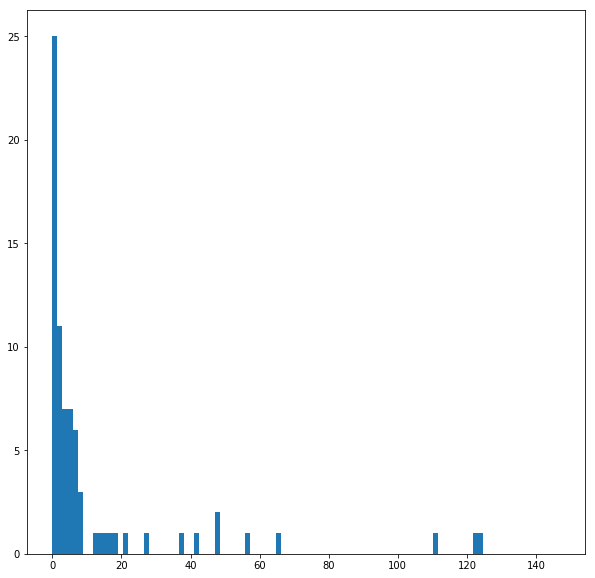

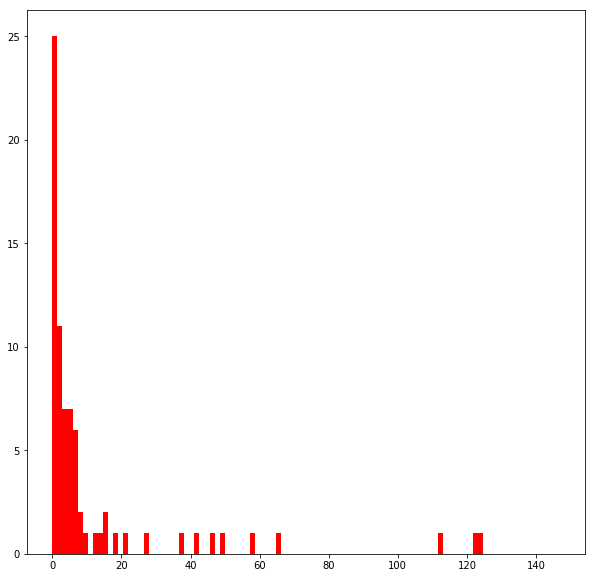

In [60]:
plt.figure(figsize=(10,10))
plt.hist(snr_grpfs1, bins=100, range=(0,np.percentile(snr_grpfs1,98)) );

plt.figure(figsize=(10,10))
plt.hist(snr_grpfs2, bins=100, range=(0,np.percentile(snr_grpfs1,98)),color='r' );

In [85]:
cat1_grp[cat1_grp['snr_grpf']>1e3]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402716794206,402700140027,77,76,1,315,316,287,289,1.0,0.0,3.2877302,-2.29535,0.2663456,27.98132,-0.13887024,4564.78,1.5231785,1.5246503,0.0066337814,0.030363133,1.5712769,1.4765522,0.67784745,1.6441163,0.17695436,0.101298235,0.10129231,0.10126421,0.0956498,76010.23,66592.46,183398.03,6245810.5,12.986509,551.73065,16.24482,nan,nan,nan,0.0,0.0,24296530000000.0,4632599300000.0,13065047000000.0,-1083629440000000.0,-3563876800000.0,16269843000000.0,23.357801,-63866.797,-142476.12,-4759.9355,41640.42,3426.5845


In [72]:
cat1_grp

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402700067501,402700140027,77,2,1,202,297,150,250,1.0,0.0,-10.032404,-19.843649,0.3143966,20.505354,0.28014755,4464841.0,2.5539706,2.6523767,-0.02490784,0.19279124,3.1097693,2.097508,0.84964025,2.6331525,0.96386564,275.9892,272.0976,272.03946,160.246,124.21056,0.0055024023,0.004213826,0.0045314436,0.0065478864,0.0050877626,0.0061016795,1.7609644,-0.047930844,0.3710006,0.0,0.0
402700140027,402700140027,77,0,1,172,219,126,162,0.99082863,0.009171369,-20.813734,-31.111609,0.6802436,21.373764,0.7788944,2006513.0,0.7852613,0.8711541,0.22111925,0.23353267,1.096036,0.56260496,0.40634724,1.0257179,0.9959019,333.14227,319.7962,319.75955,199.48529,121.86847,0.0062531484,0.004826954,0.004885578,0.0075684227,0.0066200113,0.00730216,0.6811818,0.39728415,0.4195899,0.0,0.0
402700197193,402700140027,77,4,1,245,272,233,277,1.0,0.0,-8.2536125,-8.928024,0.4986591,21.986204,0.38643456,1141473.8,0.64913815,0.795981,-0.4406322,0.08362016,1.0520144,0.40054616,1.4770248,0.94820863,0.91143703,215.56863,209.21082,208.90839,133.36328,48.03671,0.01147395,0.010122603,0.006523204,0.019473286,0.019501872,0.012287003,0.6090287,-0.7332906,0.13915098,0.0,0.0
402700246589,402700140027,77,1,1,151,184,113,145,0.94067144,0.05932856,-26.404596,-34.11579,0.6597126,21.790823,0.89626503,1366527.6,0.5316925,0.5655117,0.0066249957,-0.24808009,0.6850731,0.41265222,-0.77204883,0.8283183,0.99944955,286.65582,274.41458,274.41437,172.70137,171.32933,0.008893579,0.0066730515,0.0077041807,0.008978249,0.006735675,0.007719771,0.5450728,0.012187646,-0.458143,0.0,0.0
402700293644,402700140027,77,3,1,313,339,287,312,0.9946481,0.0053519066,5.2750854,-0.001524946,1.2313727,22.31187,-0.056287766,845666.94,0.30669358,0.33584508,0.1373505,0.26774418,0.41837525,0.2248244,0.5484048,0.7009104,0.99820966,226.28426,216.83734,216.83192,147.13899,111.40558,0.017270546,0.013213123,0.015497193,0.0209496,0.015984252,0.016642958,0.44122043,0.25439566,0.49569985,0.0,0.0
402700317352,402700140027,77,5,1,202,259,94,159,0.0030702716,0.9969297,-13.751777,-34.653625,2.1285295,22.157358,-0.07343292,974999.3,0.9909661,0.99892664,-0.06497416,-0.06147545,1.0839506,0.90595806,-1.1919281,1.1699818,0.9956906,135.27013,132.44862,132.44855,47.376694,46.993908,0.03625512,0.017936053,0.017918782,0.036563117,0.018057443,0.018028215,0.5428824,-0.12517038,-0.1184333,0.0,0.0
402700446626,402700140027,77,6,1,253,278,243,274,0.9921127,0.007887311,-6.8074055,-8.177113,1.2530944,22.627514,0.15967178,632327.44,0.547211,0.56340945,-0.16995434,0.016717607,0.6502122,0.46052632,1.5217714,0.8317855,0.79858214,130.00233,127.448204,127.17345,80.48118,27.119719,0.017549412,0.015461458,0.014455564,0.02973522,0.02532648,0.025912149,0.56008416,-0.32627428,0.032090347,0.0,0.0
402700460662,402700140027,77,7,1,233,256,231,254,0.9945671,0.0054329,-11.037025,-11.484813,1.0962204,22.900455,0.18823433,491773.8,0.32751903,0.32817146,-0.025522804,-0.03658713,0.34247053,0.3132203,-1.0899514,0.7000098,0.9744093,128.85326,125.75241,125.69572,83.56071,14.014892,0.023985336,0.022054583,0.022098346,0.03937925,0.050891507,0.038862474,0.44969684,-0.050946813,-0.07298604,0.0,0.0
402700699878,402700140027,77,8,1,269,292,282,303,1.0,0.0,-3.763072,-1.4458408,0.2389378,23.058933,0.48073387,424985.66,0.27141556,0.30360073,0.21424828,-0.25630718,0.3841533,0.19176303,-0.43727136,0.686542,0.9961245,118.27969,115.50717,115.50402,78.516716,56.339306,0.0391068,0.031154204,0.033148896,0.05197301

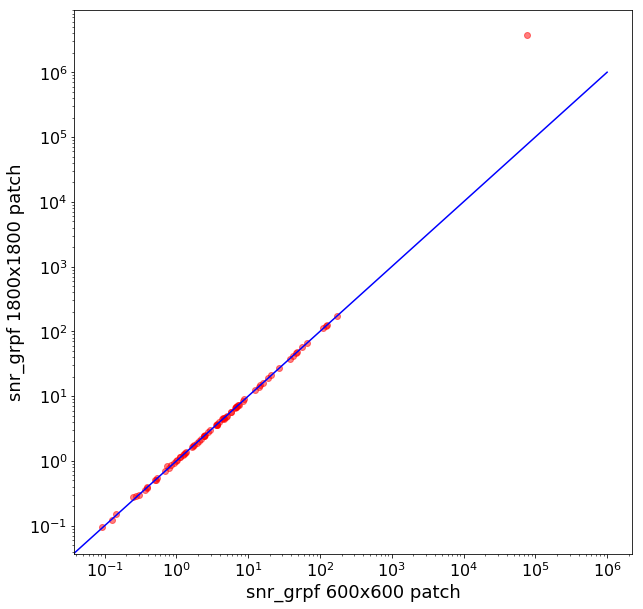

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(snr_grpfs1, snr_grpfs2, c='r', alpha=0.5)

# plt.xlim(0,140)
# plt.ylim(0,140)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("snr_grpf 600x600 patch", size = 18)
plt.ylabel("snr_grpf 1800x1800 patch", size = 18)



plt.tick_params(axis='both', which='major', labelsize=16) 
plt.plot([0,1e6],[0,1e6],c='b')

## Look at some of some of the histograms of the whole thing 

(array([4.318e+03, 1.655e+03, 7.400e+02, 3.930e+02, 3.070e+02, 2.250e+02,
        1.400e+02, 1.130e+02, 1.150e+02, 6.200e+01, 4.400e+01, 5.600e+01,
        5.400e+01, 3.500e+01, 3.000e+01, 3.500e+01, 1.700e+01, 2.000e+01,
        2.000e+01, 2.100e+01, 1.200e+01, 2.000e+01, 1.200e+01, 9.000e+00,
        1.100e+01, 1.500e+01, 8.000e+00, 1.100e+01, 9.000e+00, 6.000e+00,
        1.000e+01, 1.100e+01, 7.000e+00, 5.000e+00, 7.000e+00, 2.000e+00,
        4.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        0.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

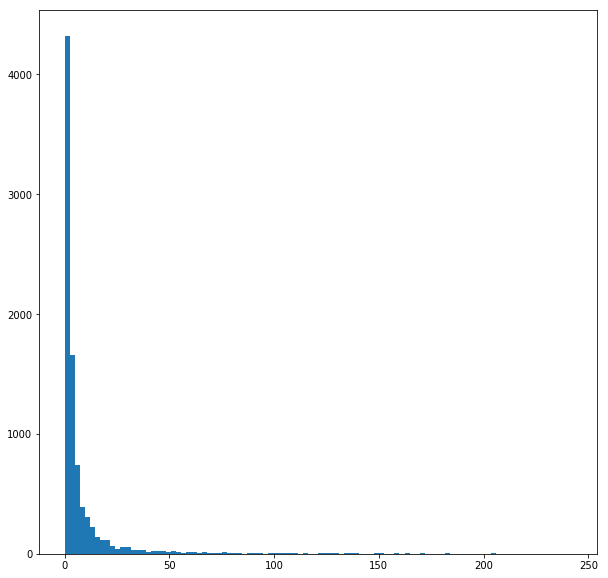

In [79]:
plt.figure(figsize=(10,10))
plt.hist(cat2['snr_grpf'],bins=100, range=(0,np.percentile(cat2['snr_grpf'],99)))

In [95]:
print(len(cat2))
print(len(cat2[cat2['snr_grpf'] > 1e3])/len(cat2))

8782
0.004099294010475973


## Biases 

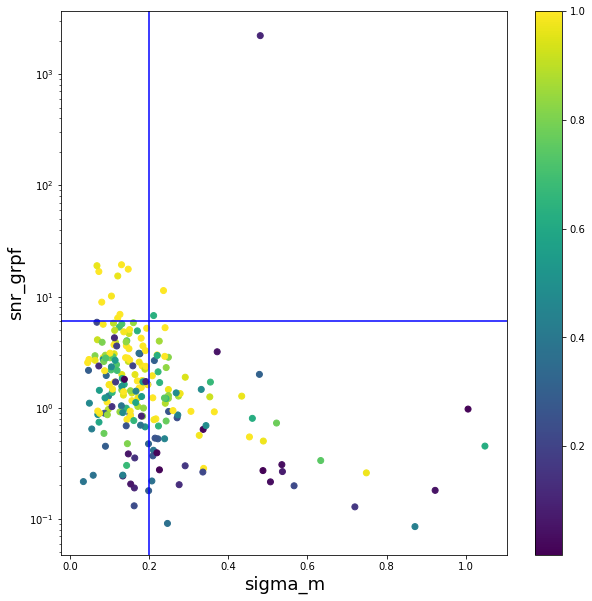

In [116]:
plt.figure(figsize=(10,10))
cat_bad = cat1[cat1['bias_g1_grp'] >1]
#plt.hist(cat_bad['snr_grpf'],bins=100)
#plt.hist(cat_bad['sigma_m'],bins=100)
plt.scatter(cat_bad['sigma_m'], cat_bad['snr_grpf'], c=cat_bad['purity'])
plt.yscale('log')
plt.axvline(0.2,c='b')
plt.axhline(6,c='b')
plt.xlabel('sigma_m', size=18)
plt.ylabel('snr_grpf', size=18)
plt.colorbar()



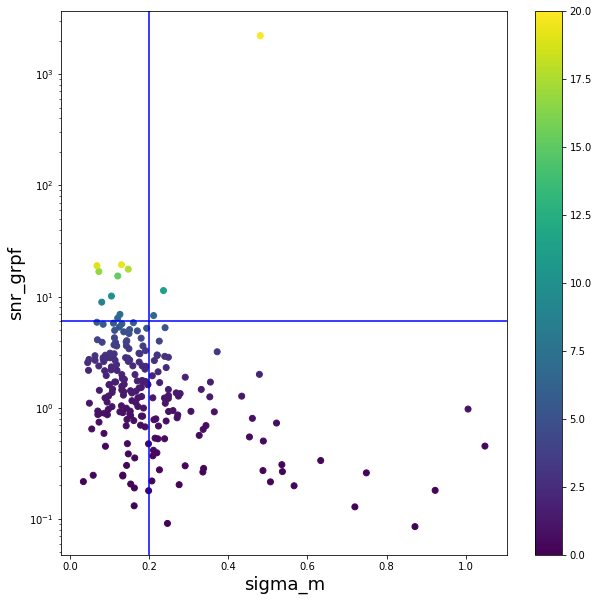

In [124]:
plt.figure(figsize=(10,10))
cat_bad = cat1[cat1['bias_g1_grp'] >1]
#plt.hist(cat_bad['snr_grpf'],bins=100)
#plt.hist(cat_bad['sigma_m'],bins=100)
plt.scatter(cat_bad['sigma_m'], cat_bad['snr_grpf'], c=cat_bad['snr_grpf'], vmax=20, vmin=0)
plt.yscale('log')
plt.axvline(0.2,c='b')
plt.axhline(6,c='b')
plt.xlabel('sigma_m', size=18)
plt.ylabel('snr_grpf', size=18)
plt.colorbar()




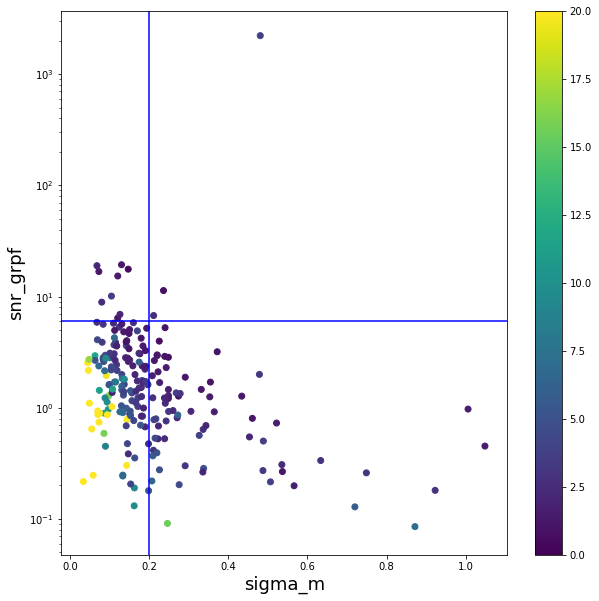

In [128]:
plt.figure(figsize=(10,10))
cat_bad = cat1[cat1['bias_g1_grp'] >1]
#plt.hist(cat_bad['snr_grpf'],bins=100)
#plt.hist(cat_bad['sigma_m'],bins=100)
plt.scatter(cat_bad['sigma_m'], cat_bad['snr_grpf'], c=cat_bad['dg1_grp'], vmax=20, vmin=0)
plt.yscale('log')
plt.axvline(0.2,c='b')
plt.axhline(6,c='b')
plt.xlabel('sigma_m', size=18)
plt.ylabel('snr_grpf', size=18)
plt.colorbar()





In [118]:
cat_not_as_bad = cat_bad[(cat_bad['snr_grpf'] > 6) & (cat_bad['sigma_m'] > 0.2)]

In [119]:
cat_not_as_bad

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
402706891398,402700003100,204,86,1,345,357,538,548,1.0,0.0,10.337672,48.654713,0.8767727,26.19399,0.8033905,23678.344,0.21107452,0.2600381,0.35134885,0.28669912,0.34422013,0.12943012,0.34220928,0.66869044,0.6345639,7.007304,6.9965177,6.9906683,4.7519016,6.7431183,1.1900746,0.9660508,0.8483864,2.5275652,2.5114725,2.169634,0.40075755,0.58703965,0.4809426,0.0,0.0,1512.4569,-2.093637,1.9256316,1.5711968,-3.7968905e-05,-6.2338e-05,2554.9414,-13.4009695,9.476831,5.2840333,-0.3399036,-0.6123049
402703732279,402703732279,1,0,1,99,116,12,24,0.9843614,0.015638594,-38.366497,-56.30184,1.3972341,25.200508,0.508091,59121.35,0.23603861,0.37854683,0.6412563,0.16994697,0.5247104,0.1061809,0.1295331,0.713345,1.0,16.803656,16.744177,16.744177,11.311707,11.311707,0.9167153,0.87710863,0.28436735,0.9167153,0.87710863,0.28436735,0.41676873,0.9285118,0.24801561,0.0,0.0,587.4532,-1.2011079,1.5379943,0.40751255,4.4853314e-06,-5.7968487e-07,587.4532,-1.2011079,1.5379943,0.40751255,4.4853314e-06,-5.7968487e-07
402712533640,402700003100,204,172,1,450,459,488,498,0.1453001,0.8546999,30.996132,38.7226,2.1637876,27.146936,0.017354965,9844.032,0.48069766,0.4807645,0.0063490034,-0.00993499,0.4863991,0.47506306,-0.50107694,0.7832761,0.10706019,2.0401204,2.0392478,2.0331807,0.4436015,2214.22,6.076396,2.4552627,2.5009613,2.7830825,3.8217998,4.1851153,0.41718537,0.008091277,-0.038825,0.0,0.0,61442.51,14.223961,-0.56987673,0.7498529,0.00082719215,-0.0013812917,-1.3388999,-19.666622,1.6911278,-0.88827544,1.3100353,-0.82548887


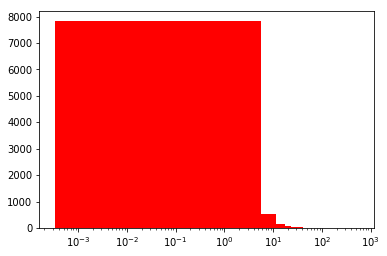

In [132]:
plt.hist(cat2['dg1_grp'], bins=100, color='r', range=(0.2,1e6))
plt.xscale('log')

4604

# Display images 

In [29]:
!./WeakLensingDeblending/display.py --input-name demo1_pinv.fits --select 'grp_id==402700140027' \
--clip-lo-noise-fraction 0.05 --magnification 2 --output-name finder1_1_pinv.png 

!./WeakLensingDeblending/display.py --input-name demo2_pinv.fits --select 'grp_id==402700140027' \
--clip-lo-noise-fraction 0.05 --magnification 1 --output-name finder2_1_pinv.png 

Figure(1200x1200)
Figure(1800x1800)


In [90]:
#look at weird object 
!./WeakLensingDeblending/display.py --input-name demo1_pinv_bias.fits --select 'db_id==402716794206' \
--clip-lo-noise-fraction 0.05 --magnification 2 --output-name finder1_2_pinv_bias.png --info '%(db_id).0f' --draw-moments

Figure(1200x1200)
